<a href="https://colab.research.google.com/github/kadobkina/ship_detection/blob/master/ship_detection_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
!pip install tensorflow
!pip install --upgrade tensorflow-hub

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init() #check

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AdHtrGL1W1V7nhXNkzlB")
project = rf.workspace("kadobkina").project("ship-detection-ajhw4")
dataset = project.version(6).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=68e61010a26b6368f7c118fc2196d4b067a08c9495fc3528656414ae6b36fec0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Ship-Detection-6 in yolov5pytorch:: 100%|██████████| 4178/4178 [00:01<00:00, 3591.61it/s]


In [ ]:
# best.pt is the best weights from training model in the note "ship_detection.ipynb"
!python detect.py --weights /content/yolov5/Ship-Detection-6/best.pt --img 640 --conf 0.25 --source /content/yolov5/Ship-Detection-6/test/images --save-txt

detect: weights=['/content/yolov5/Ship-Detection-6/best.pt'], source=/content/yolov5/Ship-Detection-6/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/200 /content/yolov5/Ship-Detection-6/test/images/test100_jpg.rf.df0772a588b55323cba05e7c3fa08164.jpg: 640x640 1 ship, 439.6ms
image 2/200 /content/yolov5/Ship-Detection-6/test/images/test101_jpg.rf.9dc7adebea8798b37633e41881007ac3.jpg: 640x640 1 ship, 412.1ms
image 3/200 /content/yolov5/Ship-Detection-6/test/images/test102_jpg

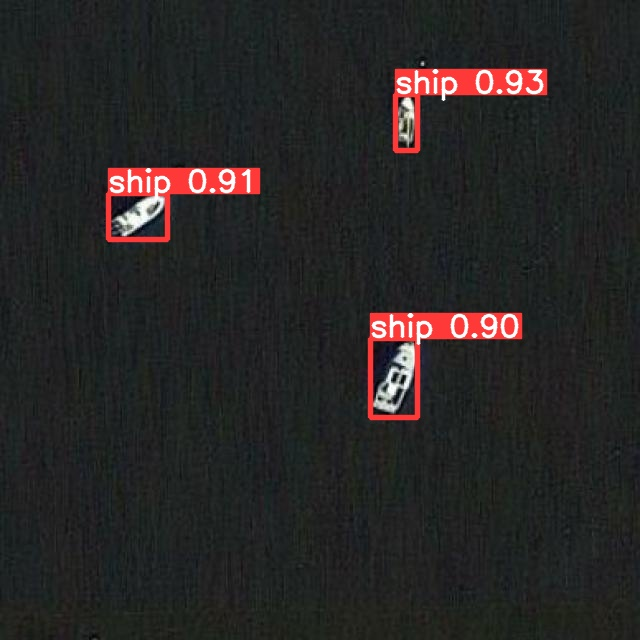

In [ ]:
#display.Image(filename='runs/detect/exp3/test106_jpg.rf.93942079b955ab189194cbca0949f797.jpg', width=600)

display.Image(filename='runs/detect/exp3/test107_jpg.rf.839e16f84b3a793aa7be903411f5a479.jpg', width=600)

#display.Image(filename='runs/detect/exp3/test113_jpg.rf.57f686fe333b19e0c356d6ecfc7511d9.jpg', width=600)

#display.Image(filename='runs/detect/exp3/test122_jpg.rf.ebf98f3f9575a85d9d7ab59693734f60.jpg', width=600)



---


**Choose an image for measure similarity**

In [ ]:
#image_label_path = '/content/yolov5/runs/detect/exp3/labels/test106_jpg.rf.93942079b955ab189194cbca0949f797.txt'
#image_path = '/content/yolov5/Ship-Detection-6/test/images/test106_jpg.rf.93942079b955ab189194cbca0949f797.jpg'

image_label_path = '/content/yolov5/runs/detect/exp3/labels/test107_jpg.rf.839e16f84b3a793aa7be903411f5a479.txt'
image_path = '/content/yolov5/Ship-Detection-6/test/images/test107_jpg.rf.839e16f84b3a793aa7be903411f5a479.jpg'

#image_label_path = '/content/yolov5/runs/detect/exp3/labels/test113_jpg.rf.57f686fe333b19e0c356d6ecfc7511d9.txt'
#image_path = '/content/yolov5/Ship-Detection-6/test/images/test113_jpg.rf.57f686fe333b19e0c356d6ecfc7511d9.jpg'

#image_label_path = '/content/yolov5/runs/detect/exp3/labels/test122_jpg.rf.ebf98f3f9575a85d9d7ab59693734f60.txt'
#image_path = '/content/yolov5/Ship-Detection-6/test/images/test122_jpg.rf.ebf98f3f9575a85d9d7ab59693734f60.jpg'

## **Image preparation**

In [ ]:
# Extraction x,y,weight,height of bounding boxes

f = open(image_label_path, 'r')

coord_bounding_boxes = [] # x,y,w,h of ships on the image
for line in f:
  coord_bounding_boxes.append(line)
f.close()

ships = [] # Without unused symbols
for index_bounding_boxes in range(len(coord_bounding_boxes)):
  ships.append(coord_bounding_boxes[index_bounding_boxes][1:-2].split())
ships

[['0.614844', '0.589844', '0.0734375', '0.12343'],
 ['0.214844', '0.3375', '0.0921875', '0.07187'],
 ['0.634375', '0.190625', '0.034375', '0.087']]

In [ ]:
# x,y,w,h relative to actual size and convertation to float
for ship in ships:
  for ind in range(len(ship)):
    if ind % 2 == 0:
      ship[ind] = cv2.imread(image_path).shape[0]*float(ship[ind])
    else:
      ship[ind] = cv2.imread(image_path).shape[1]*float(ship[ind])

ships

[[393.50015999999994, 377.50016000000005, 47.0, 78.9952],
 [137.50016, 216.0, 59.0, 45.9968],
 [406.0, 122.0, 22.0, 55.67999999999999]]

left, upper - верхний левый угол (x,y)
>
right, lower - нижний правый угол (x,y)

In [ ]:
# Convertation x,y,w,h to left,upper,right,lower
new_coord_ships = []
for ship in ships:
  (x,y,w,h) = ship

  left = x-w*0.5
  upper = y-h*0.5

  right = x+w*0.5
  lower = y+h*0.5

  new_coord_ships.append([left,upper,right,lower])


new_coord_ships

[[370.00015999999994, 338.0025600000001, 417.00015999999994, 416.99776],
 [108.00016, 193.0016, 167.00016, 238.9984],
 [395.0, 94.16, 417.0, 149.84]]

In [ ]:
!mkdir /content/similarity/

mkdir: cannot create directory ‘/content/similarity/’: File exists


In [ ]:
# Creation a list of ships within detected bounding boxes
ships_objects_on_image = []

im = Image.open(image_path)
for ship in new_coord_ships:
  ships_objects_on_image.append(im.crop(ship))

for ind_ship in range(len(ships_objects_on_image)):
  ships_objects_on_image[ind_ship].save('/content/similarity/' + str(ind_ship+1) + '.jpg')

## **Ships within detected bounding boxes in the image**

Ship № 1


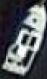

Ship № 2


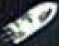

Ship № 3


In [ ]:
for ind_ship in range(len(ships_objects_on_image)):
  print('Ship №', ind_ship+1)
  ships_objects_on_image[ind_ship].show()



---

**Choose a ship in the image to measure similarity**


In [ ]:
ship_reference = input('Input the ship number to measure similarity: ')

Input the ship number to measure similarity: 1


## Computation of the measure similarity using MSE and SSIM

In [ ]:
# Path to two images to measure similarity

ship_reference_path = '/content/similarity/' + ship_reference + '.jpg'

images_paths = []
for ind_ship in range(len(ships_objects_on_image)):
  images_paths.append('/content/similarity/' + str(ind_ship+1) + '.jpg')

images_paths

['/content/similarity/1.jpg',
 '/content/similarity/2.jpg',
 '/content/similarity/3.jpg']

In [ ]:
# Computation of the mean squared error
def mse(imageA, imageB):
  mse_error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
  mse_error /= float(imageA.shape[0] * imageA.shape[1])

  return mse_error

In [ ]:
# Measuring similarity for two images
def measure_similarity(img1_path, img2_path):
  img1 = cv2.imread(img1_path)
  img2 = cv2.imread(img2_path)

  # Mean dim of the images
  dim = (int(np.mean([img1.shape[0], img2.shape[0]])), int(np.mean([img1.shape[1],img2.shape[1]])))

  # Resizing to mean dim
  img1_resized = cv2.resize(cv2.imread(img1_path), dim)
  img2_resized = cv2.resize(cv2.imread(img2_path), dim)

  #resized =[]
  #for image_filename in os.listdir('/content/similarity/'):
  #  resized.append(cv2.resize(cv2.imread('/content/similarity/'+image_filename), dim))

  # Convertation the images to grayscale
  gray1 = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

  # MSE and SSIM computation
  mse_value = mse(gray1, gray2)   # Mean squared error
  ssim_value = ssim(gray1, gray2) # Structural similarity index measure
  return (mse_value, ssim_value)

# Mean squared error and Structural similarity index measure

In [ ]:
for ship_num in range(len(images_paths)):
  MSE, SSIM = measure_similarity(ship_reference_path, images_paths[ship_num])
  print(f'{ship_reference} and {ship_num+1} ships:\n MSE = {MSE}, SSIM = {SSIM} ~ {round(SSIM*100, 2)}%')

1 and 1 ships:
 MSE = 0.0, SSIM = 1.0 ~ 100.0%
1 and 2 ships:
 MSE = 5051.145161290323, SSIM = 0.24784264955082252 ~ 24.78%
1 and 3 ships:
 MSE = 8014.478928884987, SSIM = 0.033683903045047724 ~ 3.37%


# Computation of the Cosine similarity

In [ ]:
tensors_images = []
for ind_ship in range(len(ships_objects_on_image)):
  tensor_image = tf.convert_to_tensor(Image.open('/content/similarity/' + str(ind_ship+1) + '.jpg'))
  tensors_images.append(tf.keras.preprocessing.image.smart_resize(tensor_image, (224,224)))

tensors_images[0].shape

TensorShape([224, 224, 3])

In [ ]:
#model = tf.keras.Sequential([
#    tf.keras.layers.InputLayer(input_shape = (224,224)+(3,)),
 #   hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4')])


In [ ]:
features = []
for tensor in tensors_images:
  features.append(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', trainable = True)([tensor]))

features[0]

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=array([[   0.033749,    0.080679,    0.012581, ...,           0,    0.031304,      2.9318]], dtype=float32)>

In [ ]:
features_reference_ship = []
features_other_ships = []

for ind_ship in range(len(ships_objects_on_image)):
  features_reference_ship.append(features[int(ship_reference)-1])
  features_other_ships.append(features[ind_ship])

#similarity = tf.keras.losses.cosine_similarity(
#    [features[0], features[0], features[0]],
#    [features[0], features[1], features[2]],
#    axis=-1,
#)

similarity = tf.keras.losses.cosine_similarity(
    features_reference_ship,
    features_other_ships,
    axis=-1,
)

similarities = []
for ind in range(len(similarity)):
  similarities.append(tf.math.reduce_sum(similarity[ind]))

similarities

[<tf.Tensor: shape=(), dtype=float32, numpy=-1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.94457006>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.7158978>]

In [ ]:
np.array(similarities[0])

array(         -1, dtype=float32)

# **Cosine similarity**

In [ ]:
for sim in range(len(similarities)):
  print(f'{ship_reference} and {sim+1} ships:\n Cosine similarity = {abs(np.array(similarities[sim]))} ~ {round(abs(np.array(similarities[sim]))*100, 2)}%')

1 and 1 ships:
 Cosine similarity = 1.0 ~ 100.0%
1 and 2 ships:
 Cosine similarity = 0.9445700645446777 ~ 94.46%
1 and 3 ships:
 Cosine similarity = 0.715897798538208 ~ 71.59%


# Remove all ships in the similarity folder if you want to go to a new image with ships

In [ ]:
!rm /content/similarity/*.jpg